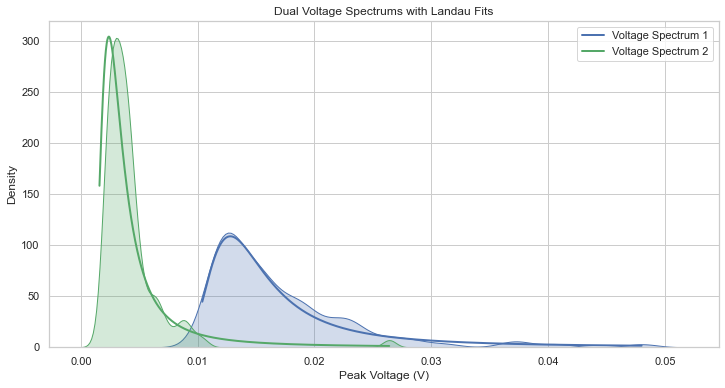

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import pylandau
from scipy.stats import gaussian_kde

def read_files(directory):
    peak_voltages_1 = []
    peak_voltages_2 = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            df = pd.read_csv(os.path.join(directory, filename), usecols=[1, 2], header=None, skiprows=21)
        elif filename.endswith(('.xlsx', '.xls')):
            df = pd.read_excel(os.path.join(directory, filename), usecols=[1, 2], header=None, skiprows=21)
        else:
            continue

        peak_voltage_1 = df[1].abs().max()
        peak_voltage_2 = df[2].abs().max()
        if np.isfinite(peak_voltage_1):
            peak_voltages_1.append(peak_voltage_1)
        else:
            print(f"Non-finite peak voltage found in column 1 of {filename}")

        if np.isfinite(peak_voltage_2):
            peak_voltages_2.append(peak_voltage_2)
        else:
            print(f"Non-finite peak voltage found in column 2 of {filename}")

    return peak_voltages_1, peak_voltages_2

def plot_voltage_histogram_with_landau_fit(peak_voltages_1, peak_voltages_2):
    if len(peak_voltages_1) == 0 or len(peak_voltages_2) == 0:
        print("No valid peak voltages to plot for one or both columns.")
        return

    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))

    plot_individual_spectrum(peak_voltages_1, 'b', 'Voltage Spectrum 1')
    plot_individual_spectrum(peak_voltages_2, 'g', 'Voltage Spectrum 2')

    plt.title('Dual Voltage Spectrums with Landau Fits')
    plt.xlabel('Peak Voltage (V)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

def plot_individual_spectrum(peak_voltages, color, label):
    kde = gaussian_kde(peak_voltages)
    x = np.linspace(min(peak_voltages), max(peak_voltages), 1000)
    kde_values = kde(x)
    sns.kdeplot(peak_voltages, bw_adjust=0.5, fill=True, color=color)

    mpv_adjusted = np.percentile(peak_voltages, 25)
    eta_adjusted = (np.percentile(peak_voltages, 75) - np.percentile(peak_voltages, 25)) / 4
    amplitude_adjusted = max(kde_values) * 1.3
    y_landau_adjusted = amplitude_adjusted * pylandau.landau(x, mpv=mpv_adjusted, eta=eta_adjusted)

    plt.plot(x, y_landau_adjusted, '-', lw=2, label=label, color=color)

# Read files and plot the histogram with Landau fitting
current_directory = os.getcwd()
peak_voltages_1, peak_voltages_2 = read_files(current_directory)
plot_voltage_histogram_with_landau_fit(peak_voltages_1, peak_voltages_2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


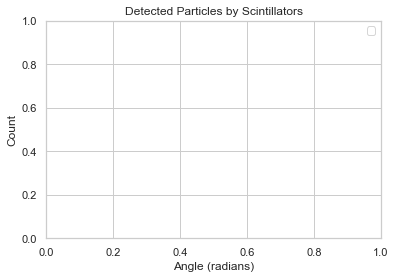

In [7]:
# Section 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Constants
MUON_LIFETIME = 2.2e-6  # Muon lifetime in seconds
ALUMINIUM_THICKNESS = 0.01  # Thickness of aluminium plate in meters
SPEED_OF_LIGHT = 3e8  # Speed of light in meters/second
MAGNETIC_FIELD_STRENGTH = 1.0  # Tesla

# Section 2: Muon Capture and Decay Simulation
def simulate_muon_decay(n_muons):
    decay_times = np.random.exponential(MUON_LIFETIME, n_muons)
    decay_positions = SPEED_OF_LIGHT * decay_times
    return decay_positions[decay_positions < ALUMINIUM_THICKNESS]

# Section 3: Magnetic Field Effect
def apply_magnetic_field(decay_positions):
    # Assuming a simple model where magnetic field affects the angular distribution
    angles = np.arccos(1 - 2 * np.random.random(len(decay_positions)))
    return angles

# Section 4: Scintillator Detection Simulation
def scintillator_detection(angles, polarity='electron'):
    # Assuming scintillators are sensitive to the angle due to polarization
    detection_efficiency = np.cos(angles) ** 2 if polarity == 'electron' else np.sin(angles) ** 2
    detected = np.random.random(len(angles)) < detection_efficiency
    return angles[detected]

# Section 5: Data Generation and Analysis
n_muons = 10000  # Number of muons to simulate
decay_positions = simulate_muon_decay(n_muons)
angles = apply_magnetic_field(decay_positions)
detected_electrons = scintillator_detection(angles, 'electron')
detected_positrons = scintillator_detection(angles, 'positron')

# Section 6: Visualization
sns.histplot(detected_electrons, color='blue', label='Electrons', kde=True)
sns.histplot(detected_positrons, color='red', label='Positrons', kde=True)
plt.xlabel('Angle (radians)')
plt.ylabel('Count')
plt.title('Detected Particles by Scintillators')
plt.legend()
plt.show()


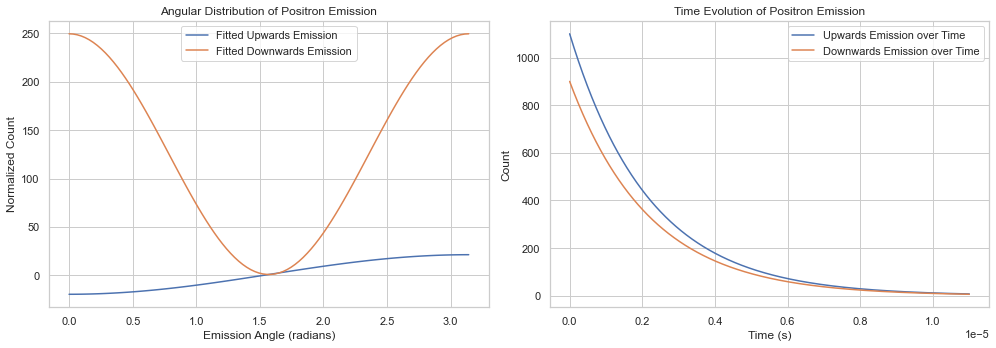

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.optimize import curve_fit

# Constants
ALPHA_PRIME = 0.1  # Replace with the actual value
ETA = 0.1  # Replace with the actual value
ALPHA = 0.1  # Replace with the actual value
OMEGA = 1.0  # Angular frequency, replace with actual value if known
DELTA = 0.0  # Phase difference, replace with actual value if known
MUON_LIFETIME = 2.2e-6  # Muon lifetime in seconds
N0 = 1000  # Initial number of muons, replace with actual value
N1 = N0    # Assuming N0 = N1 for simplicity

# Time array
time = np.linspace(0, 5 * MUON_LIFETIME, 1000)  # Replace 5 with the number of lifetimes to simulate

# Angular distribution of positrons emitted from muon decay
def angular_distribution(theta, alpha_prime=ALPHA_PRIME):
    return 1 + alpha_prime * np.cos(theta)

# Forward-backward symmetric positron emission
def symmetric_distribution(theta, eta=ETA):
    return 1 + eta * np.cos(theta)**2

# Number of positrons emitted upwards and downwards as a function of time
def N_up(t, alpha=ALPHA, omega=OMEGA, delta=DELTA):
    return N0 * np.exp(-t/MUON_LIFETIME) * (1 + alpha * omega * np.cos(omega * t + delta))

def N_down(t, alpha=ALPHA, omega=OMEGA, delta=DELTA):
    return N1 * np.exp(-t/MUON_LIFETIME) * (1 + alpha * omega * np.cos(omega * t + delta + np.pi))

# Simulate the decay process
theta = np.random.uniform(0, np.pi, N0)  # Generating random angles
up_counts = N_up(time)
down_counts = N_down(time)

# Fit the data to our theoretical models
popt_up, _ = curve_fit(angular_distribution, theta, up_counts)
popt_down, _ = curve_fit(symmetric_distribution, theta, down_counts)

# Plotting
plt.figure(figsize=(14, 5))

# Plot angular distribution
plt.subplot(1, 2, 1)
theta_vals = np.linspace(0, np.pi, 100)
plt.plot(theta_vals, angular_distribution(theta_vals, *popt_up), label='Fitted Upwards Emission')
plt.plot(theta_vals, symmetric_distribution(theta_vals, *popt_down), label='Fitted Downwards Emission')
plt.xlabel('Emission Angle (radians)')
plt.ylabel('Normalized Count')
plt.title('Angular Distribution of Positron Emission')
plt.legend()

# Plot time evolution
plt.subplot(1, 2, 2)
plt.plot(time, N_up(time), label='Upwards Emission over Time')
plt.plot(time, N_down(time), label='Downwards Emission over Time')
plt.xlabel('Time (s)')
plt.ylabel('Count')
plt.title('Time Evolution of Positron Emission')
plt.legend()

plt.tight_layout()
plt.show()


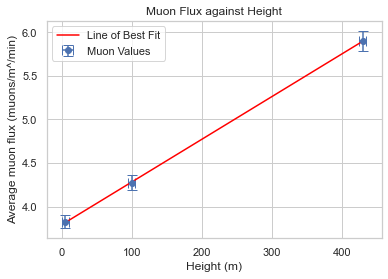

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data points
heights = np.array([5, 100, 430])
muon_values = np.array([3.827243583, 4.272765566, 5.89998491])

# Uncertainty of 2% in y-axis
uncertainty_percentage_y = 2
uncertainties_y = muon_values * (uncertainty_percentage_y / 100)

# Uncertainty of ±5 m in x-axis
uncertainty_x = 5
uncertainties_x = np.full_like(heights, uncertainty_x)

# Fit a linear polynomial (1st degree) to the data
coefficients = np.polyfit(heights, muon_values, 1)
line_of_best_fit = np.polyval(coefficients, heights)

# Plotting the points with error bars in both x and y axes
plt.errorbar(heights, muon_values, xerr=uncertainties_x, yerr=uncertainties_y, fmt='o', capsize=5, label='Muon Values')

# Plotting the line of best fit
plt.plot(heights, line_of_best_fit, label='Line of Best Fit', color='red')

# Adding labels and title
plt.xlabel('Height (m)')
plt.ylabel('Average muon flux (muons/m^/min)')
plt.title('Muon Flux against Height')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()